In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
# Set paths for the Cats vs. Dogs dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=True)
base_dir = os.path.join(os.path.dirname(dataset_path), 'cats_and_dogs_filtered')

# Define training and validation directories
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Training subdirectories
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Validation subdirectories
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Get file counts for analysis
num_train_cats = len(os.listdir(train_cats_dir))
num_train_dogs = len(os.listdir(train_dogs_dir))
num_val_cats = len(os.listdir(validation_cats_dir))
num_val_dogs = len(os.listdir(validation_dogs_dir))

print(f"Training cats images: {num_train_cats}")
print(f"Training dogs images: {num_train_dogs}")
print(f"Validation cats images: {num_val_cats}")
print(f"Validation dogs images: {num_val_dogs}")

# Total number of images
total_train = num_train_cats + num_train_dogs
total_val = num_val_cats + num_val_dogs

print(f"Total training images: {total_train}")
print(f"Total validation images: {total_val}")

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load the data
batch_size = 32
img_size = (150, 150)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

68606236/68606236 [==============================] - 194s 3us/step
Training cats images: 1000
Training dogs images: 1000
Validation cats images: 500
Validation dogs images: 500
Total training images: 2000
Total validation images: 1000
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


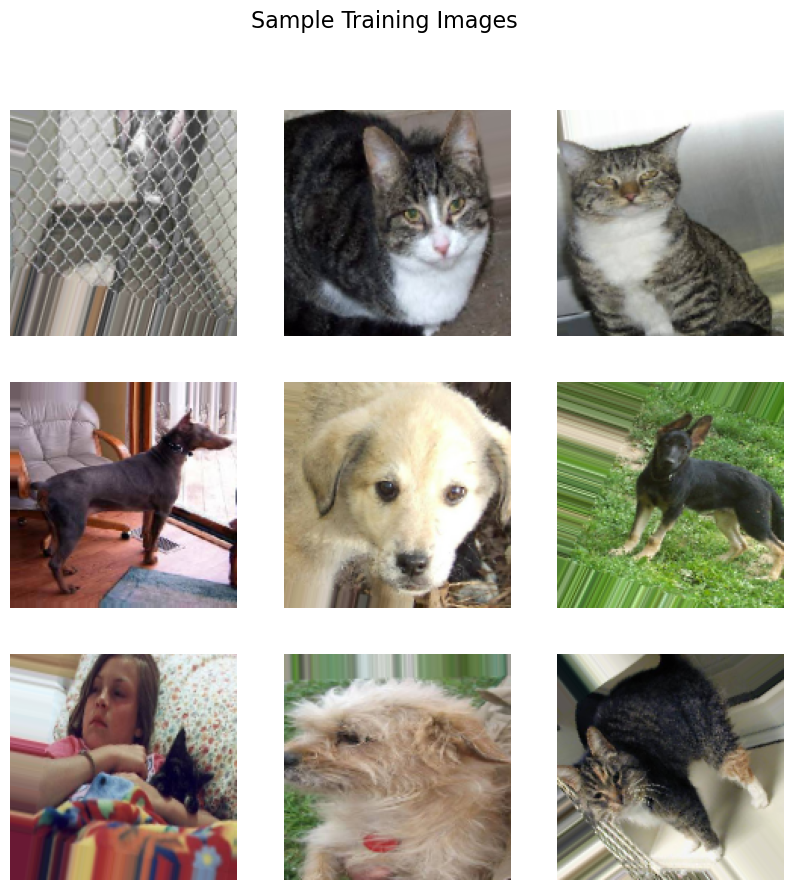

In [3]:
# Visualize some images
def plot_images(generator, title):
    sample_images, _ = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(sample_images[i])
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

plot_images(train_generator, "Sample Training Images")

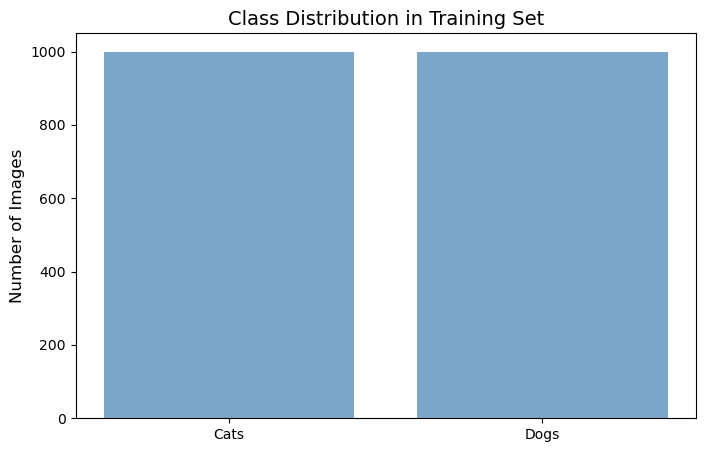

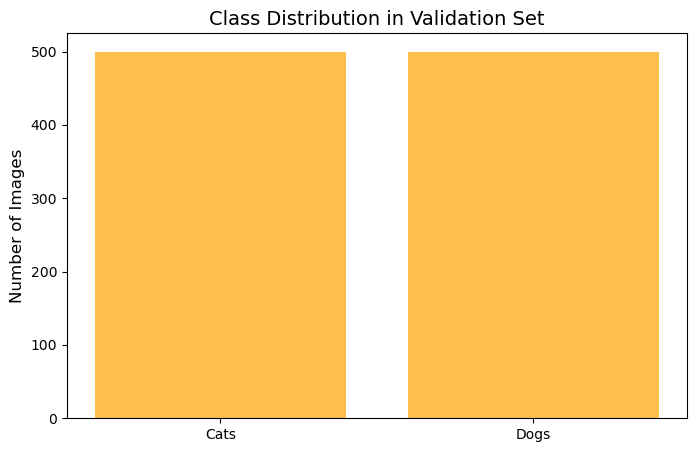

In [4]:
# Analyze class distribution
train_classes = train_generator.classes
val_classes = validation_generator.classes

plt.figure(figsize=(8, 5))
plt.bar(['Cats', 'Dogs'], [np.sum(train_classes == 0), np.sum(train_classes == 1)], color='steelblue', alpha=0.7)
plt.title('Class Distribution in Training Set', fontsize=14)
plt.ylabel('Number of Images', fontsize=12)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(['Cats', 'Dogs'], [np.sum(val_classes == 0), np.sum(val_classes == 1)], color='orange', alpha=0.7)
plt.title('Class Distribution in Validation Set', fontsize=14)
plt.ylabel('Number of Images', fontsize=12)
plt.show()